In [62]:
#import the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
imdb=pd.read_csv('https://raw.githubusercontent.com/kailikia/data-science-python/master/IMDB_Data.csv', index_col='Rank')

In [64]:
imdb.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [65]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


### Get rid of the space and paranthesis and change the column names to lower case.

In [66]:
imdb.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [67]:
imdb.columns[2]

'Description'

In [68]:
imdb.columns=imdb.columns.str.lower()
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   genre               1000 non-null   object 
 2   description         1000 non-null   object 
 3   director            1000 non-null   object 
 4   actors              1000 non-null   object 
 5   year                1000 non-null   int64  
 6   runtime (minutes)   1000 non-null   int64  
 7   rating              1000 non-null   float64
 8   votes               1000 non-null   int64  
 9   revenue (millions)  872 non-null    float64
 10  metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [186]:
imdb.rename(columns= {'runtime (minutes)':'runtime_minutes', 'revenue (millions)':'revenue_in_millions'}, inplace=True)

In [184]:

#imdb.columns=imdb.columns.str.replace("()",".")
#imdb.head()


,title,genre,description,director,actors,year,runtime (minutes),rating,votes,revenue (millions),metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## DATA WRANGLING
### Dealing with null values. 
if less than 30% is filled in, there is an option to drop column.
if more than 60% replace the missing values with an appropriate measure of central tendency.
metascore-mean revenue-mean continuous-mean categorical-mode.

In [174]:
#percentage_missing = imdb['metascore'].isnull().sum()*100/len(imdb)



percentage_missing=imdb['metascore'].isnull().sum()*100/len(imdb)
print(percentage_missing)

x = imdb['metascore'].mean()
print(x)

imdb['metascore'].fillna(x, inplace=True)


0.0
58.985042735042626


In [187]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1000 non-null   object 
 1   genre                1000 non-null   object 
 2   description          1000 non-null   object 
 3   director             1000 non-null   object 
 4   actors               1000 non-null   object 
 5   year                 1000 non-null   int64  
 6   runtime_minutes      1000 non-null   int64  
 7   rating               1000 non-null   float64
 8   votes                1000 non-null   int64  
 9   revenue_in_millions  872 non-null    float64
 10  metascore            1000 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [195]:

x = imdb['revenue_in_millions'].mean()
print(x)

imdb['revenue_in_millions'].fillna(x, inplace=True)


82.95637614678897


In [196]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1000 non-null   object 
 1   genre                1000 non-null   object 
 2   description          1000 non-null   object 
 3   director             1000 non-null   object 
 4   actors               1000 non-null   object 
 5   year                 1000 non-null   int64  
 6   runtime_minutes      1000 non-null   int64  
 7   rating               1000 non-null   float64
 8   votes                1000 non-null   int64  
 9   revenue_in_millions  1000 non-null   float64
 10  metascore            1000 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


## Exploratory Data Analysis

In [197]:
#correlation between vote-count and pop, voteaverage and releaseyear , votecount and runtime

imdb.corr()

,year,runtime_minutes,rating,votes,revenue_in_millions,metascore
year,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
runtime_minutes,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
rating,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
votes,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
revenue_in_millions,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
metascore,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


**Draw a bar chart with top ten profit movies**



In [208]:
top10=imdb.nlargest(10, 'revenue_in_millions')

top10df=top10[["revenue_in_millions", "title"]]
top10df.head()


,revenue_in_millions,title
Rank,,
51,936.63,Star Wars: Episode VII - The Force Awakens
88,760.51,Avatar
86,652.18,Jurassic World
77,623.28,The Avengers
55,533.32,The Dark Knight


In [ ]:
#top10titles=top10.title

<AxesSubplot:xlabel='title'>

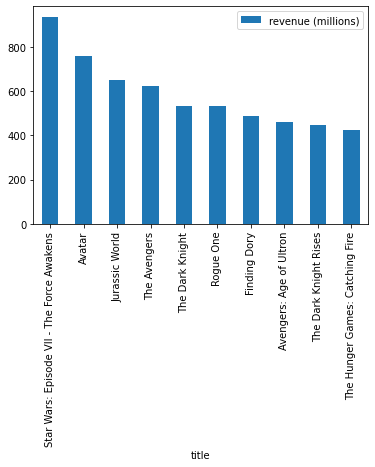

In [199]:
#plot bargraph using matplotlib
#set title as index and plot against revenue
top10df.index=top10df.title

top10df[["revenue (millions)", "title"]].plot.bar()

#top10df.plot.bar()

<module 'matplotlib.pyplot' from 'C:\\Users\\Mukiri\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

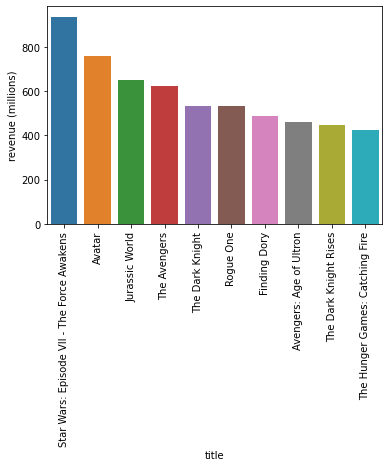

In [200]:
#plot a bragraph using seaborn
sns.barplot(data=top10df, x='title', y='revenue (millions)')
plt.xticks(rotation=90)
plt

<AxesSubplot:ylabel='director'>

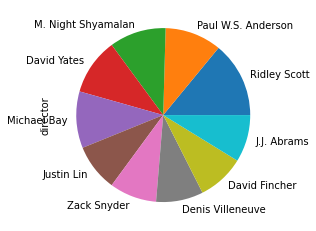

In [201]:
imdb.director.value_counts()[:10].plot.pie()

## MODELLING

SIMPLE AND MULTIPLE LINEAR REGRESSION
y = B0 + B1X
y = B0 + B1X + B2X2 + 

PREDICT THE REVENUE OF A MOVIE.
1. dependent variable y = revenue (millions)
2. independent variables  x = 

SIMPLE LINEAR REGRESSION 
y = revenue_in_millions
x = metascore

MULTIPLE REGRESSION
y = revenue_in_millions
x = metascore,votes, rating 

In [202]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1000 non-null   object 
 1   genre                1000 non-null   object 
 2   description          1000 non-null   object 
 3   director             1000 non-null   object 
 4   actors               1000 non-null   object 
 5   year                 1000 non-null   int64  
 6   runtime_minutes      1000 non-null   int64  
 7   rating               1000 non-null   float64
 8   votes                1000 non-null   int64  
 9   revenue_in_millions  1000 non-null   float64
 10  metascore            1000 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [203]:
#import the necessary libraries for this 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [211]:
y = imdb[['revenue_in_millions']]
x = imdb[['metascore']].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [212]:
#fitting the model
sim_ln_reg=LinearRegression()
sim_ln_reg.fit(x_train,y_train)

LinearRegression()

In [213]:
#test our the simple linear model
#regression model evaluation metric = RMSE
#sm_ln_reg_pred --> y^
# to predict y hat
sim_ln_reg_pred=sim_ln_reg.predict(x_test)

# to test
test_rmse = mean_squared_error(y_test,sim_ln_reg_pred)

print(f'Test RMSE: {np.sqrt(test_rmse)}')


Test RMSE: 96.16615050867371


In [214]:
#ALWAYS REMEMBER TO NORMALIZE DATA
#THAT IS BEFORE TRAINING THE MODEL
metascore_log=np.log(imdb['metascore'])

### Multiple Linear Regression

In [215]:
x=imdb[['metascore','rating','votes']]
y=imdb[['revenue_in_millions']].values.reshape(-1,1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [218]:
mult_reg=LinearRegression()
mult_reg.fit(x_train,y_train)

#Test RMSE
mult_reg_pred=mult_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,mult_reg_pred)
print(f'Test RMSE: {np.sqrt(test_rmse)}')


#Validation RMSE
mult_reg_pred_train=mult_reg.predict(x_train)
train_rmse=mean_squared_error(y_train,mult_reg_pred_train)
print(f'validation RMSE: {np.sqrt(train_rmse)}')


Test RMSE: 68.37085802621849
validation RMSE: 76.91957988933932
